In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
er_df= pd.read_csv('ER Wait Time Dataset.csv')

In [3]:
er_df.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,10-02-2024 20:20,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,28-11-2024 02:07,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,30-09-2024 04:02,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,27-02-2024 00:31,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,06-03-2024 16:52,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [4]:
er_df.shape

(5000, 19)

In [5]:
er_df.isnull().sum()

Visit ID                              0
Patient ID                            0
Hospital ID                           0
Hospital Name                         0
Region                                0
Visit Date                            0
Day of Week                           0
Season                                0
Time of Day                           0
Urgency Level                         0
Nurse-to-Patient Ratio                0
Specialist Availability               0
Facility Size (Beds)                  0
Time to Registration (min)            0
Time to Triage (min)                  0
Time to Medical Professional (min)    0
Total Wait Time (min)                 0
Patient Outcome                       0
Patient Satisfaction                  0
dtype: int64

In [6]:
er_df.columns

Index(['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Region',
       'Visit Date', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level',
       'Nurse-to-Patient Ratio', 'Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)', 'Time to Medical Professional (min)',
       'Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'],
      dtype='object')

In [7]:
import pandas as pd
iqr_columns = ['Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)','Time to Medical Professional (min)',
       'Total Wait Time (min)']

In [8]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        else:
            print(f"warning: column {col} not found in DataFrame")    
    return df

In [9]:
er_df_clean = remove_outliers_iqr(er_df, iqr_columns)

In [10]:
er_df_clean.isnull().sum()

Visit ID                              0
Patient ID                            0
Hospital ID                           0
Hospital Name                         0
Region                                0
Visit Date                            0
Day of Week                           0
Season                                0
Time of Day                           0
Urgency Level                         0
Nurse-to-Patient Ratio                0
Specialist Availability               0
Facility Size (Beds)                  0
Time to Registration (min)            0
Time to Triage (min)                  0
Time to Medical Professional (min)    0
Total Wait Time (min)                 0
Patient Outcome                       0
Patient Satisfaction                  0
dtype: int64

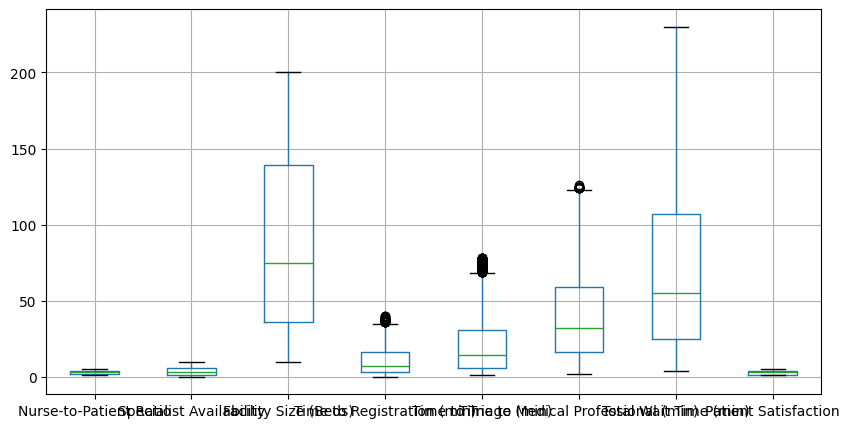

In [11]:
er_df_clean.boxplot(figsize=(10,5),fontsize=10)
plt.show()

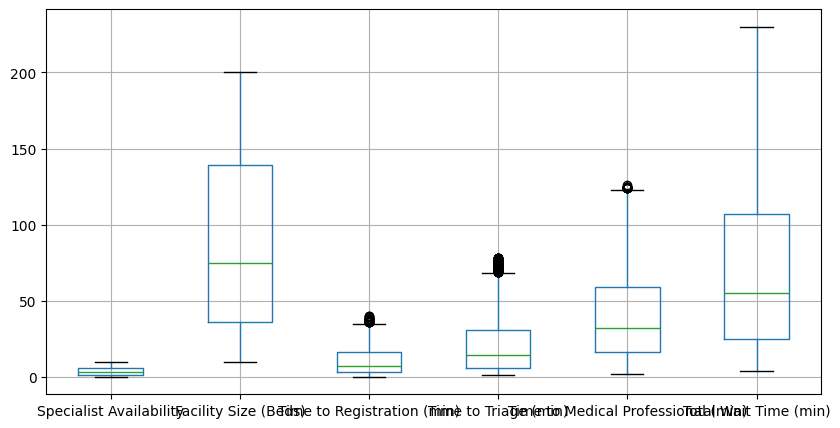

In [12]:
er_df_clean[['Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)','Time to Medical Professional (min)',
       'Total Wait Time (min)']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [17]:
# Reapply IQR outlier removal
er_df_clean = remove_outliers_iqr(er_df_clean, iqr_columns)


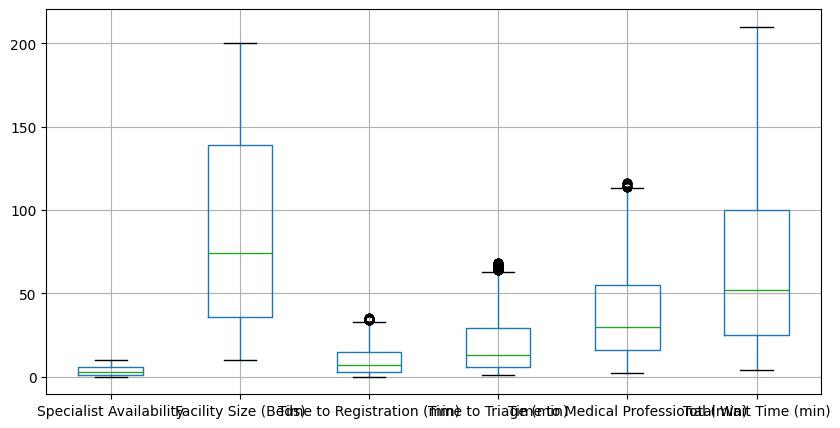

In [18]:
er_df_clean[['Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)','Time to Medical Professional (min)',
       'Total Wait Time (min)']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [19]:
er_df_clean = remove_outliers_iqr(er_df_clean, iqr_columns)

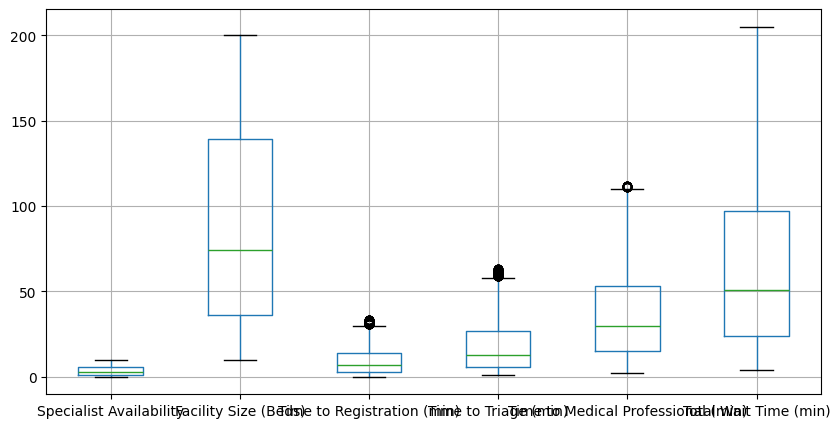

In [20]:
er_df_clean[['Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)','Time to Medical Professional (min)',
       'Total Wait Time (min)']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [21]:
from scipy import stats
import numpy as np

def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        if col in df.columns:
            z_scores = np.abs(stats.zscore(df[col].dropna()))
            df = df[(z_scores < threshold)]
        else:
            print(f"Warning: column {col} not found.")
    return df

# Apply Z-score based outlier removal
er_df_clean = remove_outliers_zscore(er_df_clean, iqr_columns)


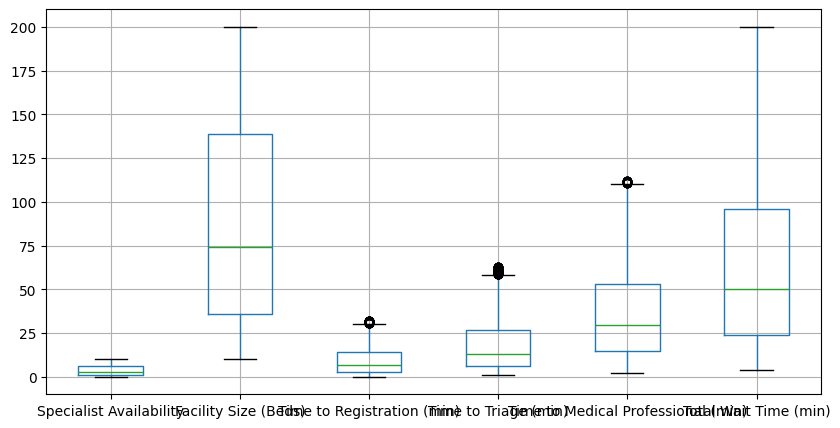

In [22]:
er_df_clean[['Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)','Time to Medical Professional (min)',
       'Total Wait Time (min)']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [23]:
er_df_clean = er_df_clean[er_df_clean['Total Wait Time (min)'] < 300]
er_df_clean = er_df_clean[er_df_clean['Time to Registration (min)'] < 60]


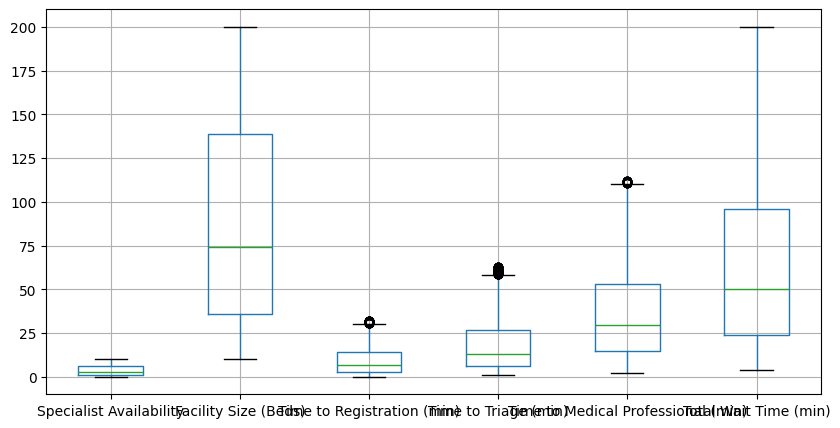

In [24]:
er_df_clean[iqr_columns].boxplot(figsize=(10,5), fontsize=10)
plt.show()


In [25]:
def winsorize_columns(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for col in columns:
        if col in df.columns:
            lower_bound = df[col].quantile(lower_percentile)
            upper_bound = df[col].quantile(upper_percentile)
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        else:
            print(f"Warning: column {col} not found.")
    return df

# Apply Winsorization
er_df_clean = winsorize_columns(er_df_clean, iqr_columns)


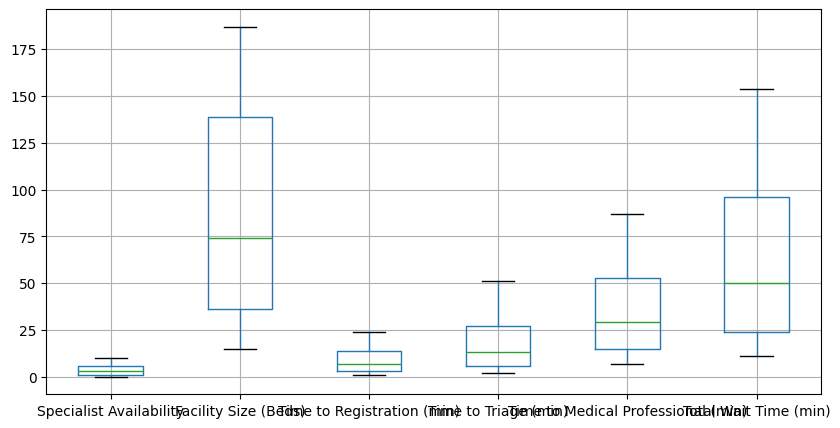

In [26]:
er_df_clean[iqr_columns].boxplot(figsize=(10,5), fontsize=10)
plt.show()

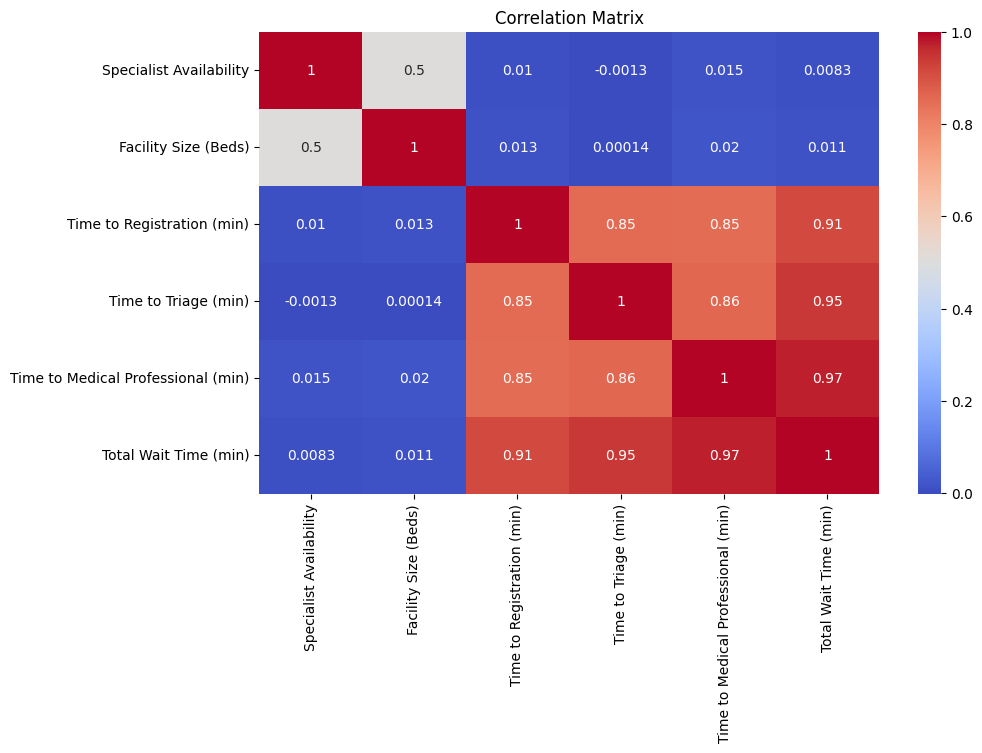

In [27]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(er_df_clean[iqr_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [29]:
er_df_clean.to_csv("cleaned_er_data.csv", index=False)
# Load the cleaned data

In [33]:
df = pd.read_csv("cleaned_er_data.csv")

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



# Drop ID columns and irrelevant identifiers
df_model = df.drop(['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Visit Date'], axis=1)

In [ ]:
# Encode categorical variables
categorical_cols = df_model.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [ ]:
# Define features and target
X = df_model.drop('Total Wait Time (min)', axis=1)
y = df_model['Total Wait Time (min)']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
features = X.columns


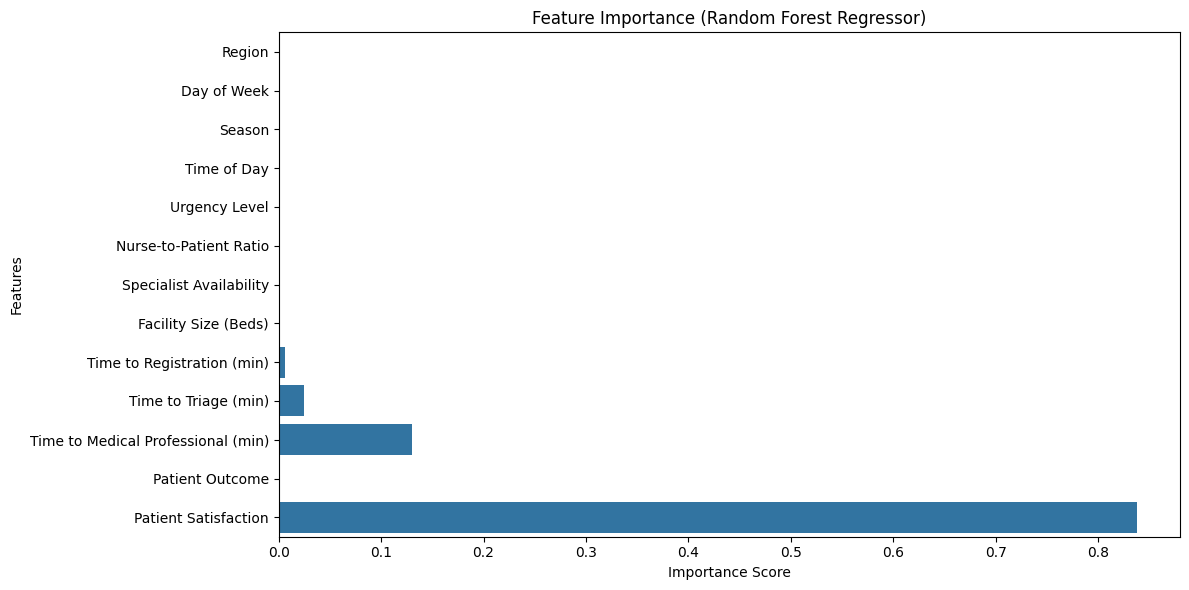

In [40]:
# Step 7: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest Regressor)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [41]:
# Predict on test data
y_pred = rf_model.predict(X_test)

In [42]:
# Create a DataFrame with actual vs predicted
results = X_test.copy()
results['Actual Wait Time'] = y_test.values
results['Predicted Wait Time'] = y_pred

In [ ]:
# Reverse encode label columns back if needed for readability
for col in label_encoders:
    results[col] = label_encoders[col].inverse_transform(results[col])

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error

In [49]:
# True vs predicted
y_true = results['Actual Wait Time']
y_pred = results['Predicted Wait Time']

In [52]:
# Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print("r2 Score:", r2)
print("Mean Absolute Error:", mae)

r2 Score: 0.9978484060994253
Mean Absolute Error: 1.1998755656108597


In [53]:
# Save the results
results.to_csv("regression_results.csv", index=False)